## Import python libraries:

First let's import the python libraries we pip installed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Read in csv file:

Then we'll need to read in the first csv file. We'll call the dataframe 'df_oldstats' since this file contains the data on 2023's trending YouTubers.

In [2]:
df_oldstats = pd.read_csv('datadump/GlobalYTstats.csv')

df_oldstats.head()

,rank,Youtuber,subscribers,video views,Category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In the next step, I'll be showing you exactly how many rows & columns of data there are.

In [3]:
cols = len(df_oldstats.axes[1])
rows = len(df_oldstats.axes[0])
print("Number of columns before cleaning data: ", cols)
print("Number of rows before cleaning data: ", rows)

#let's display all columns so we can see which ones to drop
df_oldstats.columns.values

Number of columns before cleaning data:  28
Number of rows before cleaning data:  995


array(['rank', 'Youtuber', 'subscribers', 'video views', 'Category',
       'Title', 'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype=object)

## Data cleaning commences:

In [4]:
#narrow down to only necessary columns
df_oldstats = df_oldstats.drop(columns = ['Title', 'Abbreviation', 'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank', 
                                          'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 
                                          'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 
                                          'created_month', 'created_date', 'Gross tertiary education enrollment (%)', 
                                          'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'])

#remove rows where 'YouTube' titled channels are since our focus is on content creators
#all have a video view count of zero so we'll use that to drop them from the dataset
df_oldstats = df_oldstats.drop(df_oldstats[df_oldstats['video views'] == 0].index)

#display new number of rows
new_rows = len(df_oldstats.axes[0])
print("New number of rows are:", new_rows)

New number of rows are: 987


In [5]:
#set the pandas option to display ALL cols and rows using 'None'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#drop rows to shorten data to the top 50 youtubers
df_oldstats.drop(df_oldstats.index[range(50, 987)], axis=0, inplace=True)

#reset index and drop old one
df_oldstats = df_oldstats.reset_index(drop=True)

#displaying cleaned up dataset with narrowed down cols and rows
cols = len(df_oldstats.axes[1])
rows = len(df_oldstats.axes[0])
print("Number of columns after cleaning data: ", cols)
print("Number of rows after cleaning data: ", rows)

#rename columns for time period
df_oldstats = df_oldstats.rename(columns = {"Youtuber":"23_youtubers", 
                                 "subscribers":"23_subs", 
                                 "video views":"23_video_views", 
                                 "Category":"23_category",
                                 "uploads":"23_uploads", 
                                 "Country":"23_country",
                                 "Population":"23_pop"})

#display dataframe with ALL cols and rows using 'None' in head
df_oldstats.head(None)

Number of columns after cleaning data:  8
Number of rows after cleaning data:  50


,rank,23_youtubers,23_subs,23_video_views,23_category,23_uploads,23_country,23_pop
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,1.366418e+09
1,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,3.282395e+08
2,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,3.282395e+08
3,5,SET India,159000000,1.480000e+11,Shows,116536,India,1.366418e+09
4,7,Kids Diana Show,112000000,9.324704e+10,People & Blogs,1111,United States,3.282395e+08
5,8,PewDiePie,111000000,2.905804e+10,Gaming,4716,Japan,1.262266e+08
6,9,Like Nastya,106000000,9.047906e+10,People & Blogs,493,Russia,1.443735e+08
7,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,574,United States,3.282395e+08
8,11,Zee Music Company,96700000,5.785629e+10,Music,8548,India,1.366418e+09
9,12,WWE,96000000,7.742847e+10,Sports,70127,United States,3.282395e+08


## Null values:

I noticed a few null values so let's take care of those.

In [6]:
#creating boolean mask to find null values based on rows
boo_mask = df_oldstats.isnull().any(axis=1)
null_rows = df_oldstats[boo_mask]
null_rows.head(None)

,rank,23_youtubers,23_subs,23_video_views,23_category,23_uploads,23_country,23_pop
11,15,Goldmines,86900000,2.411823e+10,Film & Animation,1,NaN,NaN
34,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,3.231243e+10,Music,11,NaN,NaN
44,49,Badabun,46800000,1.939805e+10,Entertainment,1,NaN,NaN
47,52,Bad Bunny,46100000,3.068634e+10,Music,1,NaN,NaN


In [7]:
#researched and filled null value errors based off index and column names using .at method
#some populations were listed in the dataset for certain countries already identified (like India)
df_oldstats.at[11, "23_country"] = "India"
df_oldstats.at[11, "23_pop"] = 1366417754
df_oldstats.at[34, "23_country"] = "United States"
df_oldstats.at[34, "23_pop"] = 328239523
df_oldstats.at[44, "23_country"] = "Mexico"
df_oldstats.at[44, "23_pop"] = 128455567
df_oldstats.at[47, "23_country"] = "Puerto Rico"
#pop. going based off mid 2023 for best accuracy of the related data
df_oldstats.at[47, "23_pop"] = 3260314

#now let's see if any null values still exists. False = no and True = yes.
df_oldstats.isnull().values.any()

False

## Convert data type:

Now that we've filled our null values, we can check our data types and convert the scientific notation to a more readable number.

In [8]:
#let's see what the data types are for each column
print(df_oldstats.dtypes)

rank                int64
23_youtubers       object
23_subs             int64
23_video_views    float64
23_category        object
23_uploads          int64
23_country         object
23_pop            float64
dtype: object


In [9]:
#convert the data type to int64 for the float64 cols
df_oldstats[["23_video_views", "23_pop"]] = df_oldstats[["23_video_views", "23_pop"]].astype("int64")

#view changes made to the data types for selected cols
print(df_oldstats.dtypes)

rank               int64
23_youtubers      object
23_subs            int64
23_video_views     int64
23_category       object
23_uploads         int64
23_country        object
23_pop             int64
dtype: object


In [10]:
#let's see what's left and if after researching, any corrections still need to be made
df_oldstats.head(None)

,rank,23_youtubers,23_subs,23_video_views,23_category,23_uploads,23_country,23_pop
0,1,T-Series,245000000,228000000000,Music,20082,India,1366417754
1,3,MrBeast,166000000,28368841870,Entertainment,741,United States,328239523
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,966,United States,328239523
3,5,SET India,159000000,148000000000,Shows,116536,India,1366417754
4,7,Kids Diana Show,112000000,93247040539,People & Blogs,1111,United States,328239523
5,8,PewDiePie,111000000,29058044447,Gaming,4716,Japan,126226568
6,9,Like Nastya,106000000,90479060027,People & Blogs,493,Russia,144373535
7,10,Vlad and Niki,98900000,77180169894,Entertainment,574,United States,328239523
8,11,Zee Music Company,96700000,57856289381,Music,8548,India,1366417754
9,12,WWE,96000000,77428473662,Sports,70127,United States,328239523


## Cont.' data cleaning:

I noticed an alarmingly low amount of upload counts for some youtubers so I did some research and made corrections to these values, as well, and made corrections to countries listed under YouTuber's channels.

In [11]:
#researched and made corrections to YouTuber upload count based off index and column name
df_oldstats.at[11, "23_uploads"] = 4817
df_oldstats.at[13, "23_uploads"] = 5481
df_oldstats.at[23, "23_uploads"] = 25981
df_oldstats.at[34, "23_uploads"] = 694
df_oldstats.at[44, "23_uploads"] = 18256
df_oldstats.at[46, "23_uploads"] = 776
df_oldstats.at[47, "23_uploads"] = 143
#made corrections under country column
df_oldstats.at[13, "23_country"] = "United States"
df_oldstats.at[45, "23_country"] = "India"
df_oldstats.at[46, "23_country"] = "Belarus"
#and then the population to the country Belarus that's not already listed in the dataset
df_oldstats.at[46, "23_pop"] = 9498238

#display indexes to see corrections using iloc. method
df_oldstats.iloc[[11, 13, 23, 34, 44, 45, 46, 47]]

,rank,23_youtubers,23_subs,23_video_views,23_category,23_uploads,23_country,23_pop
11,15,Goldmines,86900000,24118230580,Film & Animation,4817,India,1366417754
13,17,5-Minute Crafts,80100000,26236790209,Howto & Style,5481,United States,66834405
23,28,T-Series Bhakti Sagar,61000000,29533230328,Music,25981,India,1366417754
34,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,32312431239,Music,694,United States,328239523
44,49,Badabun,46800000,19398045702,Entertainment,18256,Mexico,128455567
45,50,SonyMusicIndiaVEVO,46600000,27286058807,Music,3444,India,328239523
46,51,A4,46300000,22936630813,Gaming,776,Belarus,9498238
47,52,Bad Bunny,46100000,30686342319,Music,143,Puerto Rico,3260314


The categories column could use some better wording for the categories listed so let's change some of those to fit more appropriately with the YouTubers content:

In [12]:
#first let's display all the values listed under the '23 Category column from the top 50 YouTubers
df_oldstats["23_category"].values

array(['Music', 'Entertainment', 'Education', 'Shows', 'People & Blogs',
       'Gaming', 'People & Blogs', 'Entertainment', 'Music', 'Sports',
       'People & Blogs', 'Film & Animation', 'Shows', 'Howto & Style',
       'Music', 'Music', 'Music', 'Entertainment', 'Education', 'Music',
       'Education', 'Music', 'Shows', 'Music', 'Sports',
       'Film & Animation', 'Music', 'Music', 'Music', 'News & Politics',
       'Music', 'Music', 'Entertainment', 'Film & Animation', 'Music',
       'Music', 'Education', 'Music', 'Music', 'Education', 'Gaming',
       'Music', 'Entertainment', 'Entertainment', 'Entertainment',
       'Music', 'Gaming', 'Music', 'Gaming', 'Entertainment'],
      dtype=object)

In [13]:
# next we'll use .loc method to change the category of certain values
df_oldstats.loc[(df_oldstats["23_category"] == "Education"), ["23_category"]] = "Educational"
df_oldstats.loc[(df_oldstats["23_category"] == "Shows"), ["23_category"]] = "Film & Animation"
#only 3 YouTubers were listed as People & Blogs and two of those are educational related. We'll fix BLACKPINK's after this.
df_oldstats.loc[(df_oldstats["23_category"] == "People & Blogs"), ["23_category"]] = "Educational"
df_oldstats.loc[(df_oldstats["23_category"] == "Music"), ["23_category"]] = "Music & Dance"
df_oldstats.loc[(df_oldstats["23_category"] == "Howto & Style"), ["23_category"]] = "DIY & Tutorials"

df_oldstats.head(None)

,rank,23_youtubers,23_subs,23_video_views,23_category,23_uploads,23_country,23_pop
0,1,T-Series,245000000,228000000000,Music & Dance,20082,India,1366417754
1,3,MrBeast,166000000,28368841870,Entertainment,741,United States,328239523
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Educational,966,United States,328239523
3,5,SET India,159000000,148000000000,Film & Animation,116536,India,1366417754
4,7,Kids Diana Show,112000000,93247040539,Educational,1111,United States,328239523
5,8,PewDiePie,111000000,29058044447,Gaming,4716,Japan,126226568
6,9,Like Nastya,106000000,90479060027,Educational,493,Russia,144373535
7,10,Vlad and Niki,98900000,77180169894,Entertainment,574,United States,328239523
8,11,Zee Music Company,96700000,57856289381,Music & Dance,8548,India,1366417754
9,12,WWE,96000000,77428473662,Sports,70127,United States,328239523


In [14]:
#now we can change the individual values that are incorrect under the category column
#made corrections based off index and column name
df_oldstats.at[5, "23_category"] = "Entertainment"
df_oldstats.at[7, "23_category"] = "Educational"
df_oldstats.at[10, "23_category"] = "Music & Dance"
df_oldstats.at[17, "23_category"] = "Film & Animation"
df_oldstats.at[27, "23_category"] = "Educational"
df_oldstats.at[32, "23_category"] = "Music & Dance"
df_oldstats.at[33, "23_category"] = "Music & Dance"
df_oldstats.at[34, "23_category"] = "Educational"
df_oldstats.at[42, "23_category"] = "Film & Animation"
df_oldstats.at[43, "23_category"] = "Film & Animation"
df_oldstats.at[46, "23_category"] = "Entertainment"
df_oldstats.at[49, "23_category"] = "Educational"

#display indexes to see corrections made
df_oldstats.iloc[[5, 7, 10, 17, 27, 32, 33, 34, 42, 43, 46, 49]]

,rank,23_youtubers,23_subs,23_video_views,23_category,23_uploads,23_country,23_pop
5,8,PewDiePie,111000000,29058044447,Entertainment,4716,Japan,126226568
7,10,Vlad and Niki,98900000,77180169894,Educational,574,United States,328239523
10,14,BLACKPINK,89800000,32144597566,Music & Dance,543,South Korea,51709098
17,22,Zee TV,70500000,73139054467,Film & Animation,129204,India,1366417754
27,32,El Reino Infantil,58400000,57271630846,Educational,1510,Argentina,44938712
32,37,Marshmello,56400000,14696003229,Music & Dance,436,United States,328239523
33,38,YRF,54600000,35302243691,Music & Dance,3707,India,1366417754
34,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,32312431239,Educational,694,United States,328239523
42,47,Get Movies,47500000,30788679536,Film & Animation,3322,Russia,144373535
43,48,Shemaroo,47400000,22519705183,Film & Animation,11451,India,1366417754


## Ranking 2023 Subs:

Now because of all these corrections we've made thus far, our ranking has gotten out of order now... let's fix that!

In [15]:
#create a new rank for the top 50 youtubers of 2023 and convert to int64 data type
df_oldstats["23_rank"] = df_oldstats['rank'].rank()
df_oldstats["23_rank"] = df_oldstats["23_rank"].astype("int64")

#make sure the data type was changed to int64
print(df_oldstats.dtypes)

df_oldstats.head(5)

rank               int64
23_youtubers      object
23_subs            int64
23_video_views     int64
23_category       object
23_uploads         int64
23_country        object
23_pop             int64
23_rank            int64
dtype: object


,rank,23_youtubers,23_subs,23_video_views,23_category,23_uploads,23_country,23_pop,23_rank
0,1,T-Series,245000000,228000000000,Music & Dance,20082,India,1366417754,1
1,3,MrBeast,166000000,28368841870,Entertainment,741,United States,328239523,2
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Educational,966,United States,328239523,3
3,5,SET India,159000000,148000000000,Film & Animation,116536,India,1366417754,4
4,7,Kids Diana Show,112000000,93247040539,Educational,1111,United States,328239523,5


## Reorder columns:

We'll reorder the columns so when others read the data, the organization of it flows better.

In [16]:
#drop old rank column and reorder new rank column
df_oldstats = df_oldstats.drop(columns = ['rank'])
df_oldstats = df_oldstats.iloc[:,[7,0,1,4,2,3,5,6]]

df_oldstats.head(None)

,23_rank,23_youtubers,23_subs,23_uploads,23_video_views,23_category,23_country,23_pop
0,1,T-Series,245000000,20082,228000000000,Music & Dance,India,1366417754
1,2,MrBeast,166000000,741,28368841870,Entertainment,United States,328239523
2,3,Cocomelon - Nursery Rhymes,162000000,966,164000000000,Educational,United States,328239523
3,4,SET India,159000000,116536,148000000000,Film & Animation,India,1366417754
4,5,Kids Diana Show,112000000,1111,93247040539,Educational,United States,328239523
5,6,PewDiePie,111000000,4716,29058044447,Entertainment,Japan,126226568
6,7,Like Nastya,106000000,493,90479060027,Educational,Russia,144373535
7,8,Vlad and Niki,98900000,574,77180169894,Educational,United States,328239523
8,9,Zee Music Company,96700000,8548,57856289381,Music & Dance,India,1366417754
9,10,WWE,96000000,70127,77428473662,Sports,United States,328239523


## Create new csv:

Now we can create a new csv with the cleaned dataframe!

In [17]:
#write the csv file into the cleaned_data folder
#commented out the code below to avoid creating another oldstats csv file
#df_oldstats.to_csv('cleaned_data/oldstats.csv', index=False)

## Visualizations:

How about we code a visual of the 2023 YouTuber Analysis?!

### '23 Categories Pie Chart:

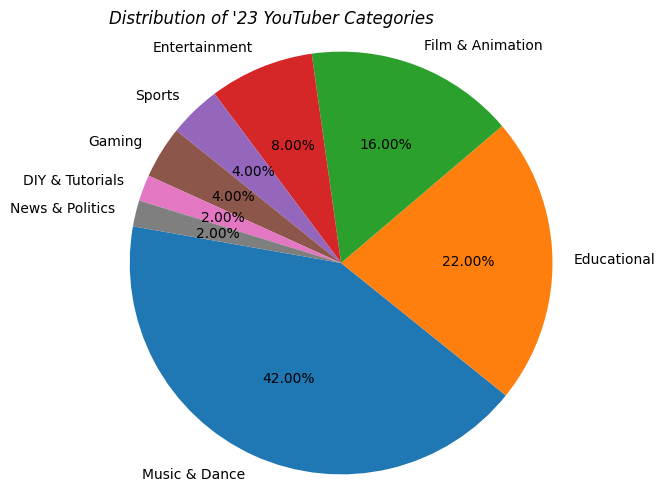

In [18]:
#group by category and calculate the total number for each category
count_oldcat = df_oldstats["23_category"].value_counts()

#now we can create a pie plot on the percentage breakdown of all categories
plt.figure(figsize=(6, 6))
plt.pie(count_oldcat, labels=count_oldcat.index, autopct='%1.2f%%', startangle=170)
plt.title("Distribution of '23 YouTuber Categories", loc="left", fontstyle='italic')
#the equal aspect ratio will ensure the pie plot is circular
plt.axis("equal")
plt.show()

It looks like the most popular channel category in 2023 was Music & Dance, with DIY & Tutorials along with News & Politics being the least. <br> Comparing to the 2024 Category Pie Chart, we can see that there was a 2% drop from the Music & Dance and Entertainment content creators, with a 4% increase from the Film & Animation creators.

In [19]:
#commented out as a future piece of work
#visuals to try out later on

#sort_category = df_oldstats("23_category", ascending=False)
#sns.barplot(x="23_category", y="23_youtubers", data=sort_category)
#plt.title("Most Common Categories of 2023")
#plt.show()